## Importing Libaries 

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()
ss=StandardScaler()
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
from matplotlib.pyplot import show

### Demographic Data set 1

In [2]:
demo1=pd.read_csv("C:/Uidai/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_0_500000.csv")

In [3]:
demo1.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [4]:
demo1['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur', 'Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra and Nagar Haveli', 'Orissa', 'Pondicherry',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'west Bengal', 'Daman & Diu', 'West  Bengal', 'odisha',
       'Jammu & Kashmir', 'Lakshadweep', 'Dadra & Nagar Haveli',
       'Westbengal', 'andhra pradesh', 'WEST BENGAL', 'West Bangal',
       'West bengal', 'ODISHA', 'WESTBENGAL', 'Chhatisgarh',
       'West Bengli', 'Darbhanga', 'Puttenahalli'], dtype=object)

In [5]:
demo1['new_date'] = pd.to_datetime(demo1['date'], dayfirst=True).dt.strftime('%Y%m%d')

In [6]:
demo1

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529,20250301
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375,20250301
2,01-03-2025,Gujarat,Rajkot,360006,65,765,20250301
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314,20250301
4,01-03-2025,Rajasthan,Udaipur,313801,45,785,20250301
...,...,...,...,...,...,...,...
499995,19-09-2025,Maharashtra,Satara,415212,0,1,20250919
499996,19-09-2025,Maharashtra,Satara,415312,0,5,20250919
499997,19-09-2025,Maharashtra,Satara,415510,0,3,20250919
499998,19-09-2025,Maharashtra,Satara,415511,0,10,20250919


In [7]:
demo1.shape

(500000, 7)

In [8]:
demo1['new_date'].isnull().sum()

np.int64(0)

In [9]:
print(demo1['new_date'].max())
print(demo1['new_date'].min())

20251229
20250301


### Demographic dataset 2

In [10]:
demo2=pd.read_csv("C:/Uidai/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_500000_1000000.csv")

In [11]:
demo2.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,19-09-2025,Maharashtra,Satara,415517,0,2
1,19-09-2025,Maharashtra,Satara,415518,0,2
2,19-09-2025,Maharashtra,Satara,415520,0,3
3,19-09-2025,Maharashtra,Satara,415539,1,5
4,19-09-2025,Maharashtra,Sindhudurg,416510,4,37


In [12]:
demo2['state'].unique()

array(['Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'ODISHA', 'Odisha', 'Orissa', 'Pondicherry', 'Puducherry',
       'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Sikkim', 'Uttarakhand', 'West  Bengal',
       'West Bengal', 'Andaman & Nicobar Islands', 'odisha',
       'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Lakshadweep', 'Madhya Pradesh', 'Ladakh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'west Bengal', 'Daman & Diu', 'Dadra & Nagar Haveli',
       'West Bangal', 'Westbengal', 'andhra pradesh', 'WESTBENGAL',
       'WEST BENGAL', 'West bengal', 'West Bengli', 'BALANAGAR',
       'Uttaranchal', '100000', 'Jaipur', 'Mad

In [13]:
demo2['new_date'] = pd.to_datetime(demo1['date'], dayfirst=True).dt.strftime('%Y%m%d')

In [14]:
demo2

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
0,19-09-2025,Maharashtra,Satara,415517,0,2,20250301
1,19-09-2025,Maharashtra,Satara,415518,0,2,20250301
2,19-09-2025,Maharashtra,Satara,415520,0,3,20250301
3,19-09-2025,Maharashtra,Satara,415539,1,5,20250301
4,19-09-2025,Maharashtra,Sindhudurg,416510,4,37,20250301
...,...,...,...,...,...,...,...
499995,31-10-2025,Uttar Pradesh,Etah,207250,2,17,20250919
499996,31-10-2025,Uttar Pradesh,Etah,207401,1,27,20250919
499997,31-10-2025,Uttar Pradesh,Etawah,206003,3,10,20250919
499998,31-10-2025,Uttar Pradesh,Etawah,206125,1,25,20250919


In [15]:
demo2.shape

(500000, 7)

In [16]:
demo2['new_date'].isnull().sum()

np.int64(0)

In [17]:
print(demo2['new_date'].max())
print(demo2['new_date'].min())

20251229
20250301


### Demographic Dataset 3

In [18]:
demo3= pd.read_csv("C:/Uidai/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_1000000_1500000.csv")

In [19]:
demo3.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-11-2025,Puducherry,Karaikal,609603,0,4
1,01-11-2025,Puducherry,Karaikal,609605,0,3
2,01-11-2025,Puducherry,Karaikal,609606,0,5
3,01-11-2025,Puducherry,Puducherry,605011,2,6
4,01-11-2025,Puducherry,Puducherry,605111,0,1


In [20]:
demo3['state'].unique()

array(['Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh',
       'Chhattisgarh', 'Dadra & Nagar Haveli', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa',
       'Pondicherry', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'andhra pradesh', 'Daman & Diu', 'Lakshadweep', 'West Bangal',
       'Jammu & Kashmir', 'Andaman & Nicobar Islands', 'ODISHA',
       'WESTBENGAL', 'West  Bengal', 'West bengal', 'Westbengal',
       'odisha', 'WEST BENGAL', 'Uttaranchal', 'west Bengal',
       'Chhatisgarh'], dtype=object)

In [21]:
demo3['new_date'] = pd.to_datetime(demo1['date'], dayfirst=True).dt.strftime('%Y%m%d')

In [22]:
demo3

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
0,01-11-2025,Puducherry,Karaikal,609603,0,4,20250301
1,01-11-2025,Puducherry,Karaikal,609605,0,3,20250301
2,01-11-2025,Puducherry,Karaikal,609606,0,5,20250301
3,01-11-2025,Puducherry,Puducherry,605011,2,6,20250301
4,01-11-2025,Puducherry,Puducherry,605111,0,1,20250301
...,...,...,...,...,...,...,...
499995,19-11-2025,Rajasthan,Baran,325217,5,61,20250919
499996,19-11-2025,Rajasthan,Baran,325219,2,16,20250919
499997,19-11-2025,Rajasthan,Baran,325221,12,51,20250919
499998,19-11-2025,Rajasthan,Barmer,344011,1,6,20250919


In [23]:
demo3.shape

(500000, 7)

In [24]:
demo3['new_date'].isnull().sum()

np.int64(0)

In [25]:
print(demo3['new_date'].max())
print(demo3['new_date'].min())

20251229
20250301


### Demographic Dataset 4

In [26]:
demo4= pd.read_csv("C:/Uidai/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_1500000_2000000.csv")

In [27]:
demo4.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,18-11-2025,Karnataka,Hasan,573118,0,2
1,18-11-2025,Karnataka,Hasan,573124,1,3
2,18-11-2025,Karnataka,Hasan,573150,0,2
3,18-11-2025,Karnataka,Hassan,573113,0,1
4,18-11-2025,Karnataka,Hassan,573120,1,4


In [28]:
demo4['state'].unique()

array(['Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Orissa',
       'Pondicherry', 'Puducherry', 'Jammu and Kashmir', 'Jharkhand',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal',
       'Andaman and Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu',
       'Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'ODISHA',
       'Arunachal Pradesh', 'Tripura', 'Andaman & Nicobar Islands',
       'Lakshadweep', 'West Bengli', 'West  Bengal', 'West Bangal',
       'Westbengal', 'Dadra & Nagar Haveli', 'West bengal', 'BALANAGAR',
       'Uttaranchal', 'WESTBENGAL', 'WEST BENGAL', 'Jaipur',
       'Madanapalle', 'andhra pradesh', 'odisha', 'west Bengal'],
     

In [29]:
demo4['new_date'] = pd.to_datetime(demo1['date'], dayfirst=True).dt.strftime('%Y%m%d')

In [30]:
demo4

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
0,18-11-2025,Karnataka,Hasan,573118,0,2,20250301
1,18-11-2025,Karnataka,Hasan,573124,1,3,20250301
2,18-11-2025,Karnataka,Hasan,573150,0,2,20250301
3,18-11-2025,Karnataka,Hassan,573113,0,1,20250301
4,18-11-2025,Karnataka,Hassan,573120,1,4,20250301
...,...,...,...,...,...,...,...
499995,16-12-2025,Maharashtra,Dharashiv,413506,1,3,20250919
499996,16-12-2025,Maharashtra,Dharashiv,413507,0,1,20250919
499997,16-12-2025,Maharashtra,Dharashiv,413601,0,1,20250919
499998,16-12-2025,Maharashtra,Dharashiv,413602,0,1,20250919


In [31]:
demo4.shape

(500000, 7)

In [32]:
demo4['new_date'].isnull().sum()

np.int64(0)

In [33]:
print(demo4['new_date'].max())
print(demo4['new_date'].min())

20251229
20250301


### Demographic Dataset 5

In [34]:
demo5= pd.read_csv("C:/Uidai/api_data_aadhar_demographic/api_data_aadhar_demographic/api_data_aadhar_demographic_2000000_2071700.csv")

In [35]:
demo5.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,16-12-2025,Madhya Pradesh,Shajapur,465113,0,4
1,16-12-2025,Madhya Pradesh,Shajapur,465226,2,14
2,16-12-2025,Madhya Pradesh,Shajapur,465339,1,2
3,16-12-2025,Madhya Pradesh,Shajapur,465447,1,19
4,16-12-2025,Madhya Pradesh,Sheopur,476332,11,25


In [36]:
demo5['state'].unique()

array(['Madhya Pradesh', 'Maharashtra', 'Uttar Pradesh', 'Uttarakhand',
       'West Bangal', 'West Bengal', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Orissa', 'Pondicherry', 'Puducherry',
       'Punjab', 'Rajasthan', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'West bengal', 'andhra pradesh', 'west Bengal',
       'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Daman & Diu',
       'Daman and Diu', 'Ladakh', 'Lakshadweep', 'Sikkim', 'Westbengal',
       '100000', 'Andaman & Nicobar Islands',
       'Andaman and Nicobar Islands', 'Dadra & Nagar Haveli', 'ODISHA',
       'odisha', 'Nagpur', 'WESTBENGAL', 'WEST BENGAL',
       'Raja Annamalai Puram', 'West  Bengal'], dtype=object)

In [37]:
demo5['new_date'] = pd.to_datetime(demo1['date'], dayfirst=True).dt.strftime('%Y%m%d')

In [38]:
demo5

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
0,16-12-2025,Madhya Pradesh,Shajapur,465113,0,4,20250301
1,16-12-2025,Madhya Pradesh,Shajapur,465226,2,14,20250301
2,16-12-2025,Madhya Pradesh,Shajapur,465339,1,2,20250301
3,16-12-2025,Madhya Pradesh,Shajapur,465447,1,19,20250301
4,16-12-2025,Madhya Pradesh,Sheopur,476332,11,25,20250301
...,...,...,...,...,...,...,...
71695,29-12-2025,West Bengal,West Midnapore,721212,0,12,20250916
71696,29-12-2025,West Bengal,West Midnapore,721420,0,1,20250916
71697,29-12-2025,West Bengal,West Midnapore,721424,0,5,20250916
71698,29-12-2025,West Bengal,West Midnapore,721426,0,3,20250916


In [39]:
demo5.shape

(71700, 7)

In [40]:
demo5['new_date'].isnull().sum()

np.int64(0)

In [41]:
print(demo5['new_date'].max())
print(demo5['new_date'].min())

20250916
20250301


## Merging Dataset 

In [42]:
df=pd.concat([demo1, demo2, demo3, demo4, demo5], axis=0, ignore_index=True)

In [43]:
df.shape

(2071700, 7)

In [44]:
df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529,20250301
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375,20250301
2,01-03-2025,Gujarat,Rajkot,360006,65,765,20250301
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314,20250301
4,01-03-2025,Rajasthan,Udaipur,313801,45,785,20250301


In [45]:
df['new_date'].isnull().sum()

np.int64(0)

In [46]:
df['state'].nunique()

65

## Fixing the column State

In [47]:
df['state'].unique()

array(['Uttar Pradesh', 'Andhra Pradesh', 'Gujarat', 'Rajasthan',
       'Karnataka', 'West Bengal', 'Telangana', 'Odisha', 'Maharashtra',
       'Kerala', 'Bihar', 'Tamil Nadu', 'Madhya Pradesh', 'Assam',
       'Tripura', 'Arunachal Pradesh', 'Punjab', 'Jharkhand', 'Delhi',
       'Chandigarh', 'Chhattisgarh', 'Jammu and Kashmir', 'Mizoram',
       'Nagaland', 'Himachal Pradesh', 'Goa', 'Haryana', 'Meghalaya',
       'Uttarakhand', 'Manipur', 'Daman and Diu', 'Puducherry', 'Sikkim',
       'Ladakh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Dadra and Nagar Haveli', 'Orissa', 'Pondicherry',
       'Andaman & Nicobar Islands', 'Andaman and Nicobar Islands',
       'west Bengal', 'Daman & Diu', 'West  Bengal', 'odisha',
       'Jammu & Kashmir', 'Lakshadweep', 'Dadra & Nagar Haveli',
       'Westbengal', 'andhra pradesh', 'WEST BENGAL', 'West Bangal',
       'West bengal', 'ODISHA', 'WESTBENGAL', 'Chhatisgarh',
       'West Bengli', 'Darbhanga', 'Puttenahalli', 'BALANAGAR',
  

In [48]:
df[df['state']=='Darbhanga'] # state: Bihar District: Darbhanga

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
222931,16-12-2025,Darbhanga,Near University Thana,846004,0,1,20251216
332384,16-12-2025,Darbhanga,Near University Thana,846004,0,1,20251216


In [49]:
df[df['state']=='Puttenahalli']  # State: Karnataka  District: Bangalore

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
341349,19-12-2025,Puttenahalli,5th cross,560078,0,1,20251219


In [50]:
df[df['state']=='BALANAGAR'] # State: Telangana District: Hyderabad

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
731443,13-12-2025,BALANAGAR,IDPL COLONY,500037,0,1,20251113
1557006,13-12-2025,BALANAGAR,IDPL COLONY,500037,0,1,20250914


In [51]:
df[df['state']=='100000'] # Invalid

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
795161,23-12-2025,100000,100000,100000,0,1,20251207
2007370,20-12-2025,100000,100000,100000,0,1,20250901


In [52]:
df[df['state']=='Jaipur'] # State: Rajasthan District: Jaipur

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
812275,26-12-2025,Jaipur,Near meera hospital,302016,0,1,20251212
1610763,26-12-2025,Jaipur,Near meera hospital,302016,0,1,20251016


In [53]:
df[df['state']=='Madanapalle'] # state: Andhra Pradesh  District: Chittoor

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
815006,27-12-2025,Madanapalle,Kadiri Road,517325,0,1,20251212
1631579,27-12-2025,Madanapalle,Kadiri Road,517325,0,1,20251020


In [54]:
df[df['state']=='Nagpur'] # State: Maharashtra District: Nagpur

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
2033255,22-12-2025,Nagpur,Near Uday nagar NIT garden,440024,0,1,20250906


In [55]:
df[df['state']=='Raja Annamalai Puram'] # State: Tamil Nadu District: Chennai

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date
2057984,26-12-2025,Raja Annamalai Puram,Near Dhyana Ashram,600028,0,1,20250912


In [56]:
df['state']=df['state'].replace('Darbhanga', 'Bihar')
df['state']=df['state'].replace('Puttenahalli', 'Karnataka')
df['state']=df['state'].replace('BALANAGAR', 'Telangana')
df['state']=df['state'].replace('Jaipur', 'Rajasthan')
df['state']=df['state'].replace('Madanapalle', 'Andhra Pradesh')
df['state']=df['state'].replace('Nagpur', 'Maharashtra')
df['state']=df['state'].replace('Raja Annamalai Puram', 'Tamil Nadu')

In [57]:
df['state'] = df['state'].str.lower().str.strip()

mapping = {
    # West Bengal variations
    'west bengal': 'West Bengal',
    'west  bengal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bengli': 'West Bengal',
    'west bangal': 'West Bengal',
    'westbengal': 'West Bengal',
    'west bengal ': 'West Bengal',
    'west bengal': 'West Bengal',

    # Odisha variations
    'odisha': 'Odisha',
    'orissa': 'Odisha',

    # Andhra Pradesh variations
    'andhra pradesh': 'Andhra Pradesh',

    # Jammu & Kashmir variations
    'jammu & kashmir': 'Jammu and Kashmir',

    # Chhattisgarh variations
    'chhatisgarh': 'Chhattisgarh',

    # Puducherry variations
    'pondicherry': 'Puducherry',

    # Uttarakhand variations
    'uttaranchal': 'Uttarakhand',

    # Daman/Dadra UT variations
    'daman & diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra & nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'dadra and nagar haveli': 'Dadra and Nagar Haveli and Daman and Diu'
}

df['clean_state'] = df['state'].replace(mapping)

df['clean_state'] = df['clean_state'].str.title()

print(df[['state', 'clean_state']].head())


            state     clean_state
0   uttar pradesh   Uttar Pradesh
1  andhra pradesh  Andhra Pradesh
2         gujarat         Gujarat
3  andhra pradesh  Andhra Pradesh
4       rajasthan       Rajasthan


In [58]:
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date,clean_state
0,01-03-2025,uttar pradesh,Gorakhpur,273213,49,529,20250301,Uttar Pradesh
1,01-03-2025,andhra pradesh,Chittoor,517132,22,375,20250301,Andhra Pradesh
2,01-03-2025,gujarat,Rajkot,360006,65,765,20250301,Gujarat
3,01-03-2025,andhra pradesh,Srikakulam,532484,24,314,20250301,Andhra Pradesh
4,01-03-2025,rajasthan,Udaipur,313801,45,785,20250301,Rajasthan
...,...,...,...,...,...,...,...,...
2071695,29-12-2025,west bengal,West Midnapore,721212,0,12,20250916,West Bengal
2071696,29-12-2025,west bengal,West Midnapore,721420,0,1,20250916,West Bengal
2071697,29-12-2025,west bengal,West Midnapore,721424,0,5,20250916,West Bengal
2071698,29-12-2025,west bengal,West Midnapore,721426,0,3,20250916,West Bengal


In [59]:
mapping = {
    # West Bengal
    'west  bengal': 'west bengal',
    'westbengal': 'west bengal',
    'west bangal': 'west bengal',
    'west bengli': 'west bengal',

    # Odisha
    'orissa': 'odisha',

    # Puducherry
    'pondicherry': 'puducherry',

    # Uttarakhand
    'uttaranchal': 'uttarakhand',

    # Jammu and Kashmir
    'jammu & kashmir': 'jammu and kashmir',

    # Chhattisgarh
    'chhatisgarh': 'chhattisgarh',
    'chhattisgarh': 'chhattisgarh',

    # Daman/Dadra Haveli variations → merged UT name
    'daman & diu': 'dadra and nagar haveli and daman and diu',
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'dadra & nagar haveli': 'dadra and nagar haveli and daman and diu',

    # Andaman & Nicobar variations
    'andaman & nicobar islands': 'andaman and nicobar islands'
}
df['state'] = df['state'].str.lower().str.strip()

df['clean_state'] = df['state'].replace(mapping)

df = df[df['state'] != '100000']


In [60]:
df['clean_state'].nunique()

36

## Fixing the district column

#### All the district of India

In [61]:
official_districts = {
    'adilabad','agatti','agra','ahmedabad','aizawl','ajmer','akola','alappuzha','aligarh','almora','alwar','ambala','ambedkar nagar','amethi','amravati',
    'amreli','amritsar','anantapur','anantnag','angul','anjaw','ankara','araria',
    'aravalli','ariyalur','arwal','ashoknagar','auraiya','aurangabad','azamgarh',
    'bagalkot','bageshwar','bahraich','balaghat','balangir','balasore','ballari',
    'ballia','balod','baloda bazar','balrampur','banaskantha','banda','bandipora',
    'bangalore rural','bangalore urban','bankura','banswara','barabanki','baramulla',
    'baran','bareilly','barnala','barwani','bastar','bathinda','beed','begusarai',
    'belagavi','bellary','betul','bhadradri kothagudem','bhagalpur','bhandara',
    'bharatpur','bharuch','bhavnagar','bhilwara','bhiwani','bhojpur','bhopal',
    'bid','bijapur','bijnor','bikaner','bilaspur','bokaro','bongaigaon','boudh',
    'budgam','bulandshahr','buldhana','burhanpur','cachar','chamarajanagar',
    'chamba','champawat','chandauli','chandel','chandigarh','chandrapur','charaideo',
    'charkhi dadri','chennai','chhatarpur','chhindwara','chikkaballapur','chikkamagaluru',
    'chikkamagalur','chiplun','chirang','chitradurga','chittoor','chittorgarh',
    'chumoukedima','coimbatore','cuddalore','cuttack','dahod','daman','damoh',
    'darbhanga','darjeeling','darrang','datia','dausa','davanagere','dehradun',
    'deoghar','deoria','devbhumi dwarka','dhalai','dhamtari','dhanbad','dhar',
    'dharmapuri','dharwad','dhenkanal','dholpur','dhule','dimapur','dindigul',
    'dindori','dispur','doda','dumka','dungarpur','east champaran','east delhi',
    'east garo hills','east godavari','east jaintia hills','east khasi hills',
    'east siang','erode','etah','etawah','faizabad','faridabad','faridkot','farrukhabad',
    'fatehabad','fatehpur','fazilka','firozabad','firozpur','gadarwara','gadag','gadchiroli',
    'gajapati','ganderbal','ganga nagaon','gangtok','gariaband','gaya','ghaziabad','ghazipur',
    'gir somnath','giridih','goalpara','godhra','gokak','golaghat','gonda','gondia','gopalganj',
    'gorakhpur','gumla','guntur','gurdaspur','gurugram','guwahati','gwalior','hamirpur',
    'hanumangarh','hapur','hardoi','haridwar','hassan','hathras','haveri','hingoli','hisar',
    'hojai','hoshangabad','hoshiarpur','howrah','hyderabad','idukki','imphal east','imphal west',
    'indore','itanagar','jabalpur','jagatsinghpur','jagtial','jaisalmer','jajpur','jalandhar',
    'jalaun','jalgaon','jalna','jalpaiguri','jammu','jamnagar','jamtara','jamui','jangaon',
    'jangipur','jashpur','jaunpur','jayashankar bhupalpally','jehanabad','jhajjar','jhalawar',
    'jhansi','jharsuguda','jhunjhunu','jind','jodhpur','jogulamba gadwal','jorhat','junagadh',
    'kabirdham','kadapa','kaimur','kaithal','kakinada','kalahandi','kalimpong','kamareddy',
    'kamrup','kamrup metropolitan','kanchipuram','kangra','kanker','kanpur dehat','kanpur nagar',
    'kanyakumari','kapurthala','karauli','karimnagar','karimganj','karnal','karur','kasaragod',
    'kasganj','kathua','katihar','katni','kaushambi','kendrapara','kendujhar','khagaria','khammam',
    'khandwa','khargone','kheda','kheri','khorda','kishanganj','kiul','kochi','kodagu','koderma',
    'kohima','kokrajhar','kolhapur','kolkata','kollam','koraput','korba','koriya','kota','kottayam',
    'kozhikode','krishna','krishnagiri','kulgam','kullu','kumta','kundapura','kupwara','kurnool',
    'kushinagar','lahaul and spiti','lakhimpur','lalitpur','lamjung','latehar','latur','leh','lohardaga',
    'lohit','loni','lunglei','madhepura','madhubani','madurai','mahabubabad','mahabubnagar',
    'mahesana','mahoba','malappuram','malda','malegaon','mandla','mandya','mangaluru','mangan',
    'mancherial','mandi','manendragarh','mathura','maharajganj','mayurbhanj','medak',
    'medchal–malkajgiri','meerut','mirzapur','moga','monghyr','moradabad','morbi','morena',
    'mumbai city','mumbai suburban','mungeli','munger','murraya','murshidabad','muzaffarnagar',
    'muzaffarpur','mysore','nadia','nagapattinam','nagaur','nagaon','nagpur','nainital',
    'nalbari','nalgonda','nandurbar','nandurbar','nandyal','narayanpur','narmada','narsinghpur',
    'nashik','navsari','nayagarh','neemuch','nicobar','nilgiris','nirmal','nizamabad',
    'north delhi','north east delhi','north goa','north sikkim','north tripura','north west delhi',
    'nuapada','osmanabad','pakur','palakkad','palamu','palghar','pali','panchkula','panchmahal',
    'panipat','panna','papum pare','parbhani','paschim bardhaman','paschim medinipur','patan',
    'pathanamthitta','pathankot','patiala','patna','pattukkottai','pauri garhwal','perambalur',
    'peterbar','phek','pilibhit','pithoragarh','pondicherry','porbandar','prakasam','prayagraj',
    'puducherry','pudukkottai','pune','purba bardhaman','purba medinipur','puri',
    'purulia','raebareli','rae bareli','raichur','raigad','raigarh','raipur','raisen','rajanna sircilla',
    'rajgarh','rajkot','rajouri','ramanagara','rampur','ranchi','rangareddy','ratlam','ratnagiri',
    'rayagada','reasi','rewari','rewa','ri bhoi','rohtak','rohtas','rudraprayag','rupnagar','sagar',
    'saharanpur','saharsa','sahibganj','salem','samastipur','samba','sambalpur','sangareddy','sangli',
    'sangrur','sant kabir nagar','saraikela kharsawan','saran','satara','satna','sawai madhopur',
    'sehore','senapati','seoni','seraikela-kharsawan','shahdol','shahjahanpur','shajapur','shamli',
    'sheikhpura','sheohar','sheopur','shimla','shimoga','shivamogga','shivpuri','shopian','shrawasti','siang',
    'sibsagar','sidhi','siddharthnagar','sikar','sikkim','simdega','singrauli','sirmaur',
    'siwan','solan','solapur','sonbhadra','sonipat','sonitpur','south delhi','south goa','south tripura',
    'south 24 parganas','sri ganganagar','sri potti sriramulu nellore','sukma','sultanpur',
    'supaul','surajpur','surat','surendranagar','tapi','tarn taran','telangana','tehri garhwal',
    'thane','thanjavur','theni','thiruvananthapuram','thoothukkudi','tiruchirappalli','tirunelveli',
    'tirupattur','tiruppur','tiruvallur','tiruvannamalai','tiswadi','tonk','tuensang','tumakuru',
    'udalguri','udham singh nagar','udhampur','udupi','ujjain','una','unnao','upper siang',
    'upper subansiri','vadodara','vaishali','valsad','varanasi','vellore','vidisha','vijayapura',
    'vijayawada','virudhunagar','visakhapatnam','vizianagaram','wanaparthy','warangal',
    'west delhi','west garo hills','west godavari','west jaintia hills','west karbi anglong',
    'west khasi hills','west singhbhum','wokha','yadadri bhuvanagiri','yamunanagar','yavatmal'
}


In [62]:
df['district_clean'] = df['district'].str.lower().str.strip()

In [63]:
invalid_districts = df[~df['district_clean'].isin(official_districts)]


In [64]:
invalid_unique = invalid_districts['district_clean'].unique()
invalid_unique

array(['srikakulam', 'udaipur', 'mulugu', 'ganganagar', 'thrissur',
       'belgaum', 'kancheepuram', 'tinsukia', 'bengaluru', 'nabarangapur',
       'purnia', 'jaipur', 'churu', 'west kameng', 'jalor',
       'alluri sitharama raju', 'sitamarhi', 'khunti', 'ananthapuramu',
       'hooghly', 'central delhi', 'chhotaudepur', 'kannauj',
       'sabarkantha', 'kolar', 'tawang', 'ganjam', 'kawardha',
       'gandhinagar', 'puruliya', 'bara banki', 'mumbai', 'mysuru',
       'surendra nagar', 'annamayya', 'narayanpet', 'tenkasi',
       'anakapalli', 'pratapgarh', 'kallakurichi', 'tikamgarh', 'nawada',
       'dakshina kannada', 'north 24 parganas', 'peren', 'ludhiana',
       'bhadrak', 'amroha', 'parvathipuram manyam', 'k.v. rangareddy',
       'unakoti', 'baramula', 'kalaburagi', 'ernakulam',
       'south west delhi', 'kannur', 'mainpuri', 'medchal-malkajgiri',
       'namakkal', 'davangere', 'arvalli', 'ahmadnagar', 'chamrajanagar',
       'buxar', 'nagarkurnool', 'peddapalli', 'west c

In [65]:
district_mapping = {
    'srikakulam': 'srikakulam',
    'udaipur': 'udaipur',
    'mulugu': 'mulugu',
    'ganganagar': 'sri ganganagar',
    'thrissur': 'thrissur',
    'belgaum': 'belagavi',
    'kancheepuram': 'kanchipuram',
    'tinsukia': 'tinsukia',
    'nabarangapur': 'nabarangapur',
    'purnia': 'purnea',
    'jaipur': 'jaipur',
    'churu': 'churu',
    'west kameng': 'west kameng',
    'jalor': 'jalore',
    'sitamarhi': 'sitamarhi',
    'khunti': 'khunti',
    'hooghly': 'hooghly',
    'central delhi': 'central delhi',
    'chhotaudepur': 'chhota udepur',
    'kannauj': 'kannauj',
    'sabarkantha': 'sabarkantha',
    'kolar': 'kolar',
    'tawang': 'tawang',
    'ganjam': 'gajapati',
    'kawardha': 'kabirdham',
    'gandhinagar': 'gandhinagar',
    'puruliya': 'purulia',
    'bara banki': 'barabanki',
    'mysuru': 'mysore',
    'narayanpet': 'narayanpet',
    'tenkasi': 'tenkasi',
    'pratapgarh': 'pratapgarh',
    'kallakurichi': 'kallakurichi',
    'tikamgarh': 'tikamgarh',
    'nawada': 'nawada',
    'dakshina kannada': 'dakshina kannada',
    'north 24 parganas': 'north 24 parganas',
    'peren': 'peren',
    'ludhiana': 'ludhiana',
    'bhadrak': 'bhadrak',
    'amroha': 'amroha',
    'unakoti': 'unakoti',
    'baramula': 'baramulla',
    'kalaburagi': 'kalaburagi',
    'ernakulam': 'ernakulam',
    'south west delhi': 'south west delhi',
    'kannur': 'kannur',
    'mainpuri': 'mainpuri',
    'namakkal': 'namakkal',
    'davangere': 'davangere',
    'ahmadnagar': 'ahmednagar',
    'buxar': 'buxar',
    'nagarkurnool': 'nagarkurnool',
    'peddapalli': 'peddapalli',
    'west champaran': 'west champaran',
    'gurgaon': 'gurugram',
    'east singhbhum': 'east singhbhum',
    'jajapur': 'jajpur',
    'agar malwa': 'agar malwa',
    'gulbarga': 'kalaburagi',
    'ramanathapuram': 'ramanathapuram',
    'basti': 'basti',
    'baleswar': 'baleshwar',
    'uttara kannada': 'uttara kannada',
    'botad': 'botad',
    'umaria': 'umaria',
    'warangal rural': 'warangal rural',
    'palnadu': 'palnadu',
    'srinagar': 'srinagar',
    'badgam': 'budgam',
    'bundi': 'bundi',
    'ananthapur': 'anantapur',
    'sitapur': 'sitapur',
    'rajsamand': 'rajsamand',
    'villupuram': 'viluppuram',
    'karbi anglong': 'karbi anglong',
    'guna': 'guna',
    'kachchh': 'kutch',
    'koppal': 'koppal',
    'vikarabad': 'vikarabad',
    'mau': 'mau',
    'churachandpur': 'churachandpur',
    'pulwama': 'pulwama',
    'tumkur': 'tumakuru',
    'hanumakonda': 'hanumakonda',
    'garhwa': 'garhwa',
    'ayodhya': 'ayodhya',
    'anand': 'anand',
    'hailakandi': 'hailakandi',
    'mandsaur': 'mandsaur',
    'eluru': 'eluru',
    'kabeerdham': 'kabirdham',
    'siddipet': 'siddipet',
    'niwari': 'niwari',
    'uttar dinajpur': 'uttar dinajpur',
    'east nimar': 'khandwa',
    'ramban': 'ramban',
    'lucknow': 'lucknow',
    'barpeta': 'barpeta',
    'jhunjhunun': 'jhunjhunu',
    'thiruvarur': 'thiruvarur',
    'jagitial': 'jagtial',
    'sirohi': 'sirohi',
    'marigaon': 'morigaon',
    'sivaganga': 'sivaganga',
    'kamrup metro': 'kamrup metropolitan',
    'bhadohi': 'bhadohi',
    'dibrugarh': 'dibrugarh',
    'narmadapuram': 'narmadapuram',
    'birbhum': 'birbhum',
    'janjgir-champa': 'janjgir-champa',
    'jagatsinghapur': 'jagatsinghpur',
    'baksa': 'baksa',
    'dohad': 'dahod',
    'sas nagar (mohali)': 'sahibzada ajit singh nagar',
    'uttarkashi': 'uttarkashi',
    'bapatla': 'bapatla',
    'kanniyakumari': 'kanyakumari',
    'allahabad': 'prayagraj',
    'kaimur (bhabua)': 'kaimur',
    'gautam buddha nagar': 'gautam buddha nagar',
    'rangareddi': 'rangareddy',
    'nanded': 'nanded',
    'bandipore': 'bandipora',
    'chamoli': 'chamoli',
    'sirsa': 'sirsa',
    'mewat': 'nuh',
    'suryapet': 'suryapet',
    'mahasamund': 'mahasamund',
    'surguja': 'surguja',
    'yamuna nagar': 'yamunanagar',
    'barmer': 'barmer',
    'ferozepur': 'ferozepur',
    'punch': 'poonch',
    'mahendragarh': 'mahendragarh',
    'serchhip': 'serchhip',
    'kurukshetra': 'kurukshetra',
    'anuppur': 'anuppur',
    'durg': 'durg',
    'dewas': 'dewas',
    'kolasib': 'kolasib',
    'ramanagar': 'ramanagara',
    'ashok nagar': 'ashoknagar',
    'rajnandgaon': 'rajnandgaon',
    'bidar': 'bidar',
    'jhabua': 'jhabua',
    'tirupati': 'tirupati',
    'harda': 'harda',
    'bhind': 'bhind',
    'yadgir': 'yadgir',
    'vijayanagara': 'vijayanagara',
    'west sikkim': 'west sikkim',
    'alirajpur': 'alirajpur',
    'nellore': 'sri potti sriramulu nellore',
    'sindhudurg': 'sindhudurg',
    'washim': 'washim',
    'kargil': 'kargil',
    'sundergarh': 'sundargarh',
    'sambhal': 'sambhal',
    'wayanad': 'wayanad',
    'sahebganj': 'sahibganj',
    'nalanda': 'nalanda',
    'dhubri': 'dhubri',
    'khowai': 'khowai',
    'gingoan': None,   # unclear
    'gariyaband': 'gariaband',
    'kodarma': 'koderma',
    'mahbubnagar': 'mahabubnagar',
    'hazaribagh': 'hazaribagh',
    'panchmahals': 'panchmahal',
    'west tripura': 'west tripura',
    'baghpat': 'baghpat',
    'dhemaji': 'dhemaji',
    'zunheboto': 'zunheboto',
    'jhargram': 'jhargram',
    'lakhisarai': 'lakhisarai',
    'gondiya': 'gondia',
    'cooch behar': 'cooch behar',
    'karaikal': 'karaikal',
    'bemetara': 'bemetara',
    'budaun': 'budaun',
    'godda': 'godda',
    'kondagaon': 'kondagaon',
    'tamenglong': 'tamenglong',
    'bargarh': 'bargarh',
    'chatra': 'chatra',
    'dakshin dinajpur': 'dakshin dinajpur',
    'mahisagar': 'mahisagar',
    'the dangs': 'dang',
    'malkangiri': 'malkangiri',
    'thoubal': 'thoubal',
    'komaram bheem': 'komaram bheem',
    'west nimar': 'khargone',
    'banka': 'banka',
    'bishnupur': 'bishnupur',
    'kandhamal': 'kandhamal',
    'mamit': 'mamit',
    'north cachar hills': 'dima hasao',
    'kra daadi': 'kra-daadi',
    'mansa': 'mansa',
    'narsimhapur': 'narsinghpur',
    'saiha': 'saiha',
    'jiribam': 'jiribam',
    'ranipet': 'ranipet',
    'the nilgiris': 'nilgiris',
    'warangal urban': 'warangal',
    'diu': 'diu',
    'malerkotla': 'malerkotla',
    'kiphire': 'kiphire',
    'palwal': 'palwal',
    'kishtwar': 'kishtwar',
    'wardha': 'wardha',
    'buldana': 'buldana',
    'dharashiv': 'dharashiv',
    'purba champaran': 'east champaran',
    'purnea': 'purnea',
    'sheikpura': 'sheikhpura',
    'dakshin bastar dantewada': 'dantewada',
    'dantewada': 'dantewada',
    'sakti': 'sakti',
    'dadra and nagar haveli': 'dadra and nagar haveli',
    'new delhi': 'new delhi',
    'north east': 'north east delhi',
    'south east delhi': 'south east delhi',
    'ahmadabad': 'ahmedabad',
    'banas kantha': 'banaskantha',
    'pakaur': 'pakur',
    'palamau': 'palamu',
    'ramgarh': 'ramgarh',
    'north garo hills': 'north garo hills',
    'south garo hills': 'south garo hills',
    'south west garo hills': 'south west garo hills',
    'champhai': 'champhai',
    'mammit': 'mamit',
    'longleng': 'longleng',
    'mokokchung': 'mokokchung',
    'mon': 'mon',
    'tseminyu': 'tseminyu',
    'baudh': 'boudh',
    'khordha': 'khordha',
    'fatehgarh sahib': 'fatehgarh sahib',
    'muktsar': 'sri muktsar sahib',
    'nawanshahr': 'shaheed bhagat singh nagar',
    'deeg': None,  # new district (2023) but uncertain
    'south andaman': 'south andaman',
    'changlang': 'changlang',
    'kamle': 'kamle',
    'longding': 'longding',
    'west siang': 'west siang',
    'biswanath': 'biswanath',
    'majuli': 'majuli',
    'bulandshahar': 'bulandshahr',
    'chitrakoot': 'chitrakoot',
    'hardwar': 'haridwar',
    'alipurduar': 'alipurduar',
    'bardhaman': 'bardhaman',
    'darjiling': 'darjeeling',
    'haora': 'haora',
    'hugli': 'hooghly',
    'koch bihar': 'cooch behar',
    'maldah': 'malda',
    'north dinajpur': 'uttar dinajpur',
    'south dinajpur': 'dakshin dinajpur',
    'south twenty four parganas': 'south 24 parganas',
    'west midnapore': 'paschim medinipur',
    'north and middle andaman': 'north and middle andaman',
    'south sikkim': 'south sikkim',
    'mayiladuthurai': 'mayiladuthurai',
    'gomati': 'gomati',
    'sepahijala': 'sepahijala',
    'namsai': 'namsai',
    'tirap': 'tirap',
    'bajali': 'bajali',
    'samstipur': 'samastipur',
    'east kameng': 'east kameng',
    'kurung kumey': 'kurung kumey',
    'aurangabad(bh)': 'aurangabad',
    'lahul and spiti': 'lahaul and spiti',
    'bengaluru south': None,  # region, not district
    'chamrajnagar': 'chamarajanagar',
    'namchi': 'namchi',
    'east sikkim': 'east sikkim',
    'kasargod': 'kasaragod',
    'lakshadweep': 'lakshadweep',
    'subarnapur': 'subarnapur',
    'dhaulpur': 'dholpur',
    'nicobars': 'nicobar',
    'kotputli-behror': None,  # 2023 district but borders unclear
    'phalodi': None,  # newly proposed region
    'pakke kessang': 'pakke kessang',
    'hnahthial': 'hnahthial',
    'balotra': None,  # new district 2023 — keep None to be safe
    'leh (ladakh)': 'leh',
    'khairthal-tijara': None,  # new 2023 district
    'south dumdum(m)': 'south dumdum',
    'bicholim': 'bicholim',
    'poonch': 'poonch',
    'kangpokpi': 'kangpokpi',
    'kadiri road': None, # address, not district
    'hingoli *': 'hingoli',
    'tiruvarur': 'thiruvarur',
    'udupi *': 'udupi',
    'jyotiba phule nagar *': 'amroha',
    'bhadrak(r)': 'bhadrak',
    'chitrakoot *': 'chitrakoot',
    'chandauli *': 'chandauli',
    'bijapur(kar)': 'vijayapura',
    'bandipur': 'chamrajanagar',
    'nandurbar *': 'nandurbar',
    'yakuma nagar nit garden': None,
    'bengaluru': None,
    'mumbai': None,
    'annamayya': None,
    'anakapalli': None,
    'parvathipuram manyam': None,
    'k.v. rangareddy': None,
    'chumukedima': None,
    'gadag *': 'gadag',
    'yadadri.': 'yadadri bhuvanagiri',
    'sribhumi': None,
    'east': None,
    'sonapur': None,
    'majuli': 'majuli',
    'east midnapur': 'purba medinipur',
    'south': None,
    'west': None,
    'aurangabad(bh)': 'aurangabad',
    'dhalai  *': 'dhalai',
    'south  twenty four parganas': 'south 24 parganas',
    'near university thana': None,
    '5th cross': None,
    'idpl colony': None,
    'near meera hospital': None,
    'near dhyana ashram': None,
    'medchalâ\x88\x92malkajgiri': None,
}


In [66]:
df['district_clean'] = df['district_clean'].replace(district_mapping)

In [67]:
df = df[~df['district_clean'].isna()]

In [68]:
df['district_clean'].nunique()

856

In [69]:
district_pincode_counts = df.groupby('district_clean')['pincode'].nunique().reset_index()
district_pincode_counts.sort_values('pincode', ascending=False, inplace=True)
district_pincode_counts

,district_clean,pincode
74,barddhaman,173
778,thrissur,169
223,east godavari,154
619,pune,152
564,north 24 parganas,152
...,...,...
799,udham singh nagar *,1
436,kurung kumey,1
790,tiswadi,1
853,yanam,1


In [70]:
multiple_pin = district_pincode_counts[district_pincode_counts['pincode'] > 1]
multiple_pin

,district_clean,pincode
74,barddhaman,173
778,thrissur,169
223,east godavari,154
619,pune,152
564,north 24 parganas,152
...,...,...
710,shupiyan,2
171,dadra & nagar haveli,2
231,eastern west khasi hills,2
294,hawrah,2


## Removing the duplicates

In [71]:
df.duplicated().sum()

np.int64(83463)

In [72]:
df = df.drop_duplicates()

In [73]:
df

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date,clean_state,district_clean
0,01-03-2025,uttar pradesh,Gorakhpur,273213,49,529,20250301,uttar pradesh,gorakhpur
1,01-03-2025,andhra pradesh,Chittoor,517132,22,375,20250301,andhra pradesh,chittoor
2,01-03-2025,gujarat,Rajkot,360006,65,765,20250301,gujarat,rajkot
3,01-03-2025,andhra pradesh,Srikakulam,532484,24,314,20250301,andhra pradesh,srikakulam
4,01-03-2025,rajasthan,Udaipur,313801,45,785,20250301,rajasthan,udaipur
...,...,...,...,...,...,...,...,...,...
2071695,29-12-2025,west bengal,West Midnapore,721212,0,12,20250916,west bengal,paschim medinipur
2071696,29-12-2025,west bengal,West Midnapore,721420,0,1,20250916,west bengal,paschim medinipur
2071697,29-12-2025,west bengal,West Midnapore,721424,0,5,20250916,west bengal,paschim medinipur
2071698,29-12-2025,west bengal,West Midnapore,721426,0,3,20250916,west bengal,paschim medinipur


# EDA

In [74]:
for i in df.columns:
    if df[i].dtypes==object:
        df[i].fillna(df[i].mode()[0], inplace=True)
    else:
        df[i].fillna(df[i].mean(), inplace=True)

## Univarient


Column: date
date
12-12-2025    29650
24-10-2025    29530
25-10-2025    28265
27-11-2025    27972
03-12-2025    27914
              ...  
22-10-2025     6109
01-07-2025     1328
01-05-2025     1322
01-06-2025     1076
01-04-2025     1072
Name: count, Length: 95, dtype: int64


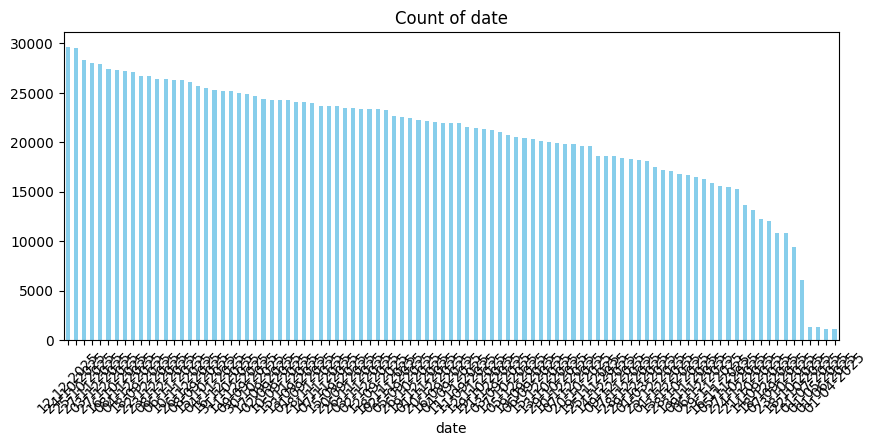

*******************************

Column: state
state
andhra pradesh                              190369
tamil nadu                                  190099
uttar pradesh                               161446
west bengal                                 158664
maharashtra                                 148049
karnataka                                   137061
kerala                                      101749
bihar                                        93690
gujarat                                      93041
odisha                                       87640
rajasthan                                    84749
telangana                                    78392
madhya pradesh                               73764
assam                                        58306
punjab                                       47846
jharkhand                                    38076
chhattisgarh                                 34304
haryana                                      27507
himachal pradesh             

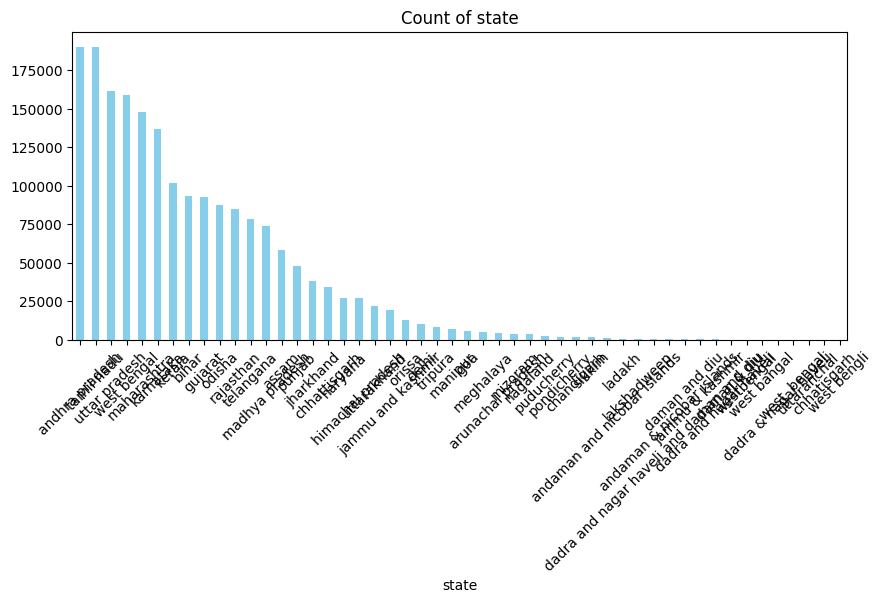

*******************************

Column: district
district
North 24 Parganas             12161
Pune                          11955
Barddhaman                    11668
Thrissur                      11662
East Godavari                 11647
                              ...  
Chitrakoot *                      1
Chandauli *                       1
Bijapur(KAR)                      1
Bandipur                          1
Near Uday nagar NIT garden        1
Name: count, Length: 956, dtype: int64


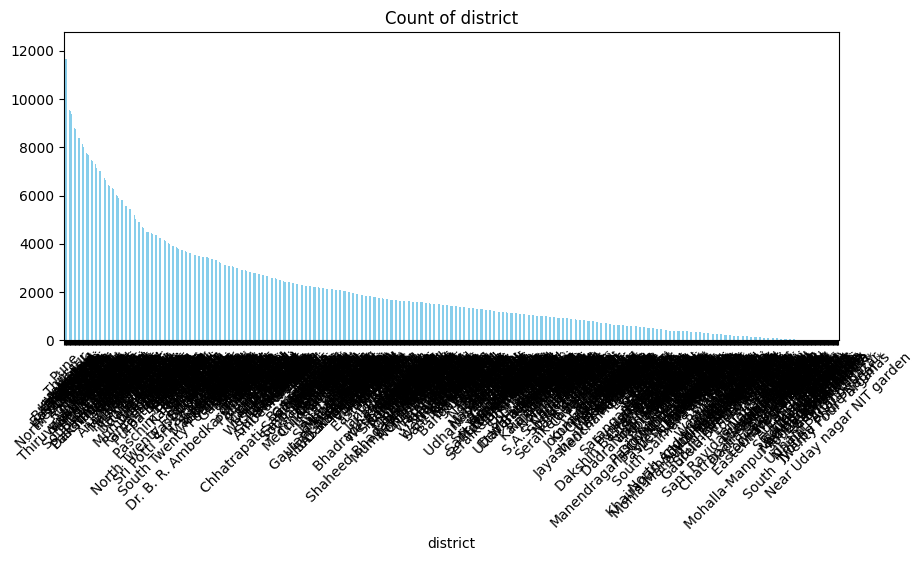

*******************************

Distribution of pincode


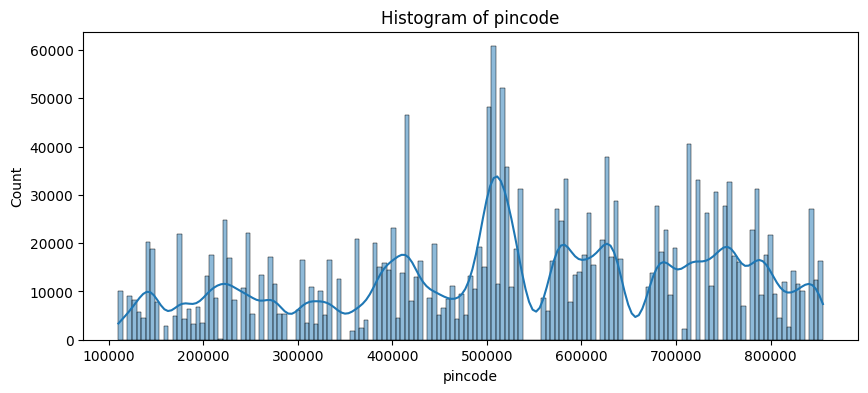

Outliers in pincode


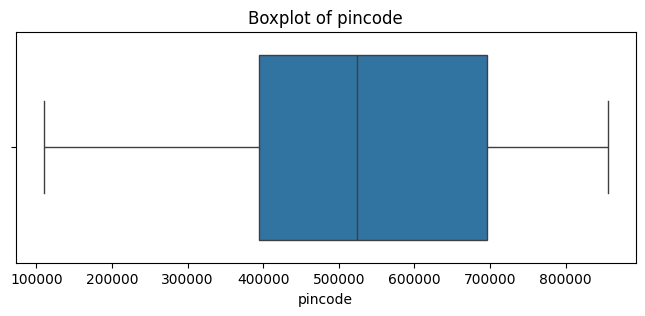

*******************************

Distribution of demo_age_5_17


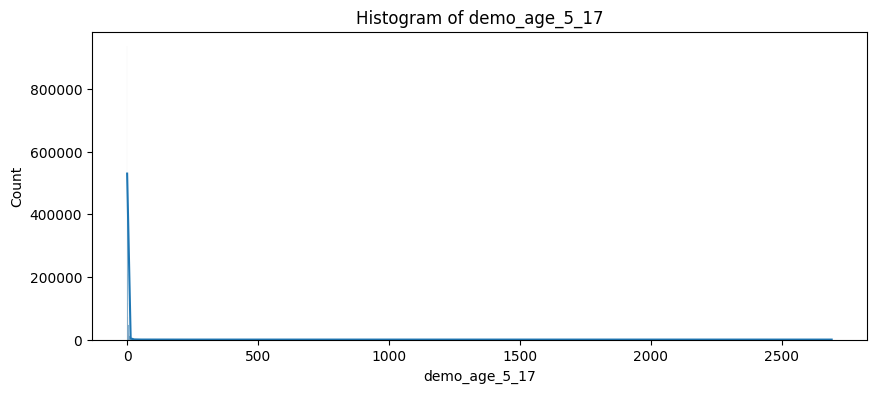

Outliers in demo_age_5_17


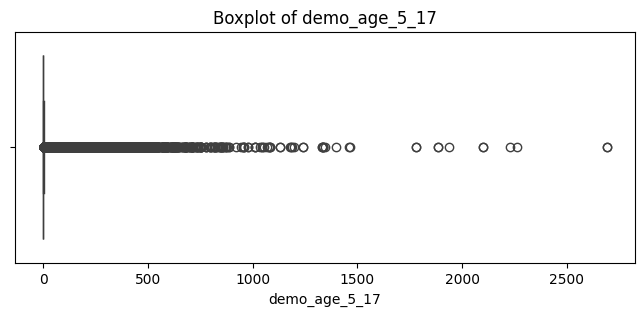

*******************************

Distribution of demo_age_17_


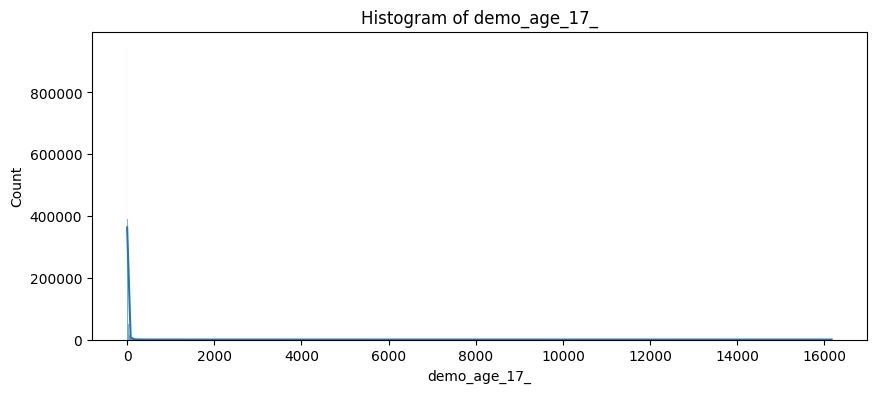

Outliers in demo_age_17_


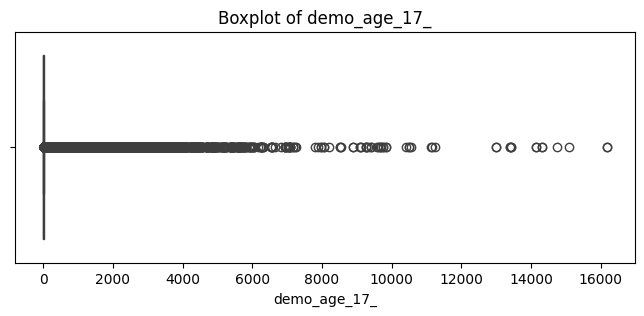

*******************************

Column: new_date
new_date
20250910    48929
20250915    47641
20250912    47350
20250902    43650
20250908    43230
            ...  
20251226     2079
20250401     2055
20250601     1861
20251116      120
20251112       87
Name: count, Length: 95, dtype: int64


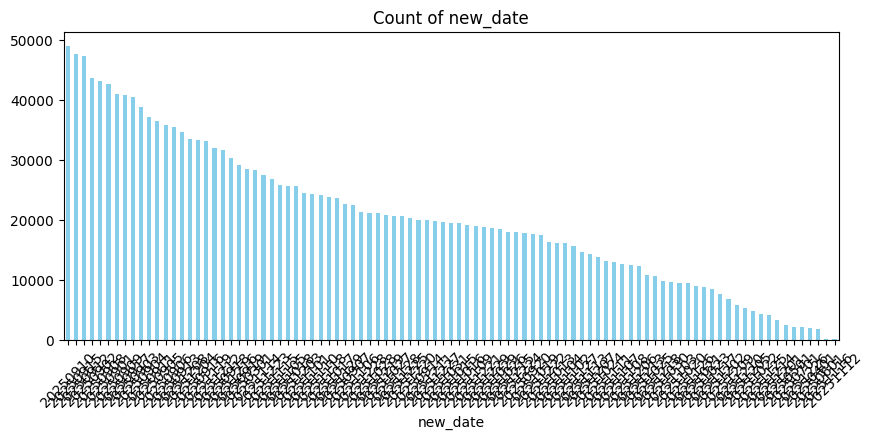

*******************************

Column: clean_state
clean_state
andhra pradesh                              190369
tamil nadu                                  190099
uttar pradesh                               161446
west bengal                                 158984
maharashtra                                 148049
karnataka                                   137061
kerala                                      101749
odisha                                      100845
bihar                                        93690
gujarat                                      93041
rajasthan                                    84749
telangana                                    78392
madhya pradesh                               73764
assam                                        58306
punjab                                       47846
jharkhand                                    38076
chhattisgarh                                 34307
haryana                                      27507
himachal pradesh 

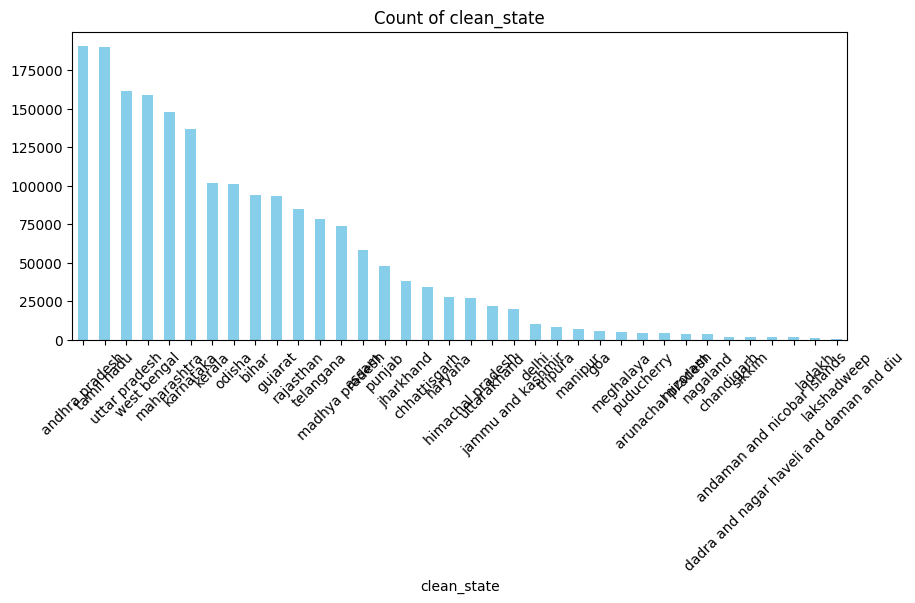

*******************************

Column: district_clean
district_clean
belagavi                      15002
anantapur                     12924
viluppuram                    12688
north 24 parganas             12161
pune                          11955
                              ...  
naihati anandabazar               2
balianta                          1
dist : thane                      1
bally jagachha                    1
near uday nagar nit garden        1
Name: count, Length: 856, dtype: int64


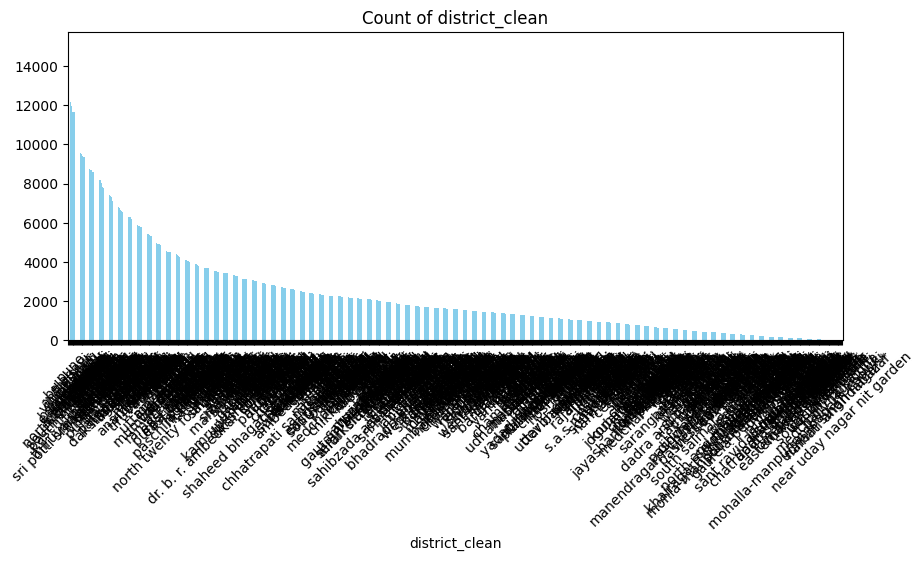

*******************************


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:

    # ---------- CATEGORICAL COLUMNS ----------
    if df[col].dtype == object:
        print(f"\nColumn: {col}")
        print(df[col].value_counts())

        plt.figure(figsize=(10,4))
        df[col].value_counts().plot(kind='bar', color='skyblue')
        plt.title(f"Count of {col}")
        plt.xticks(rotation=45)
        plt.show()

        print("*******************************")

    # ---------- NUMERICAL COLUMNS ----------
    else:
        print(f"\nDistribution of {col}")

        plt.figure(figsize=(10,4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")
        plt.show()

        print(f"Outliers in {col}")

        plt.figure(figsize=(8,3))
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

        print("*******************************")


## Bivarient

Relation between demo_age_5_17 and demo_age_17_


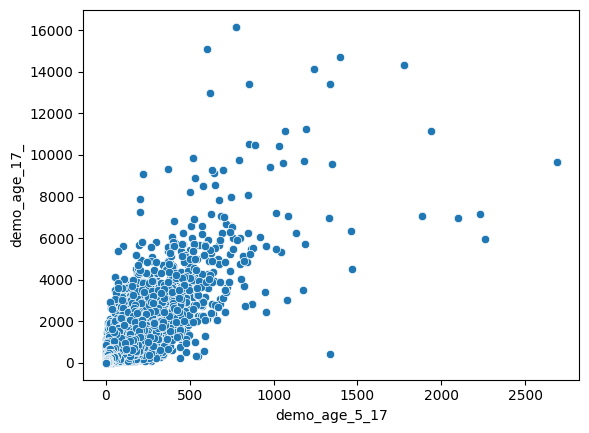

---------
Relation between clean_state and demo_age_5_17


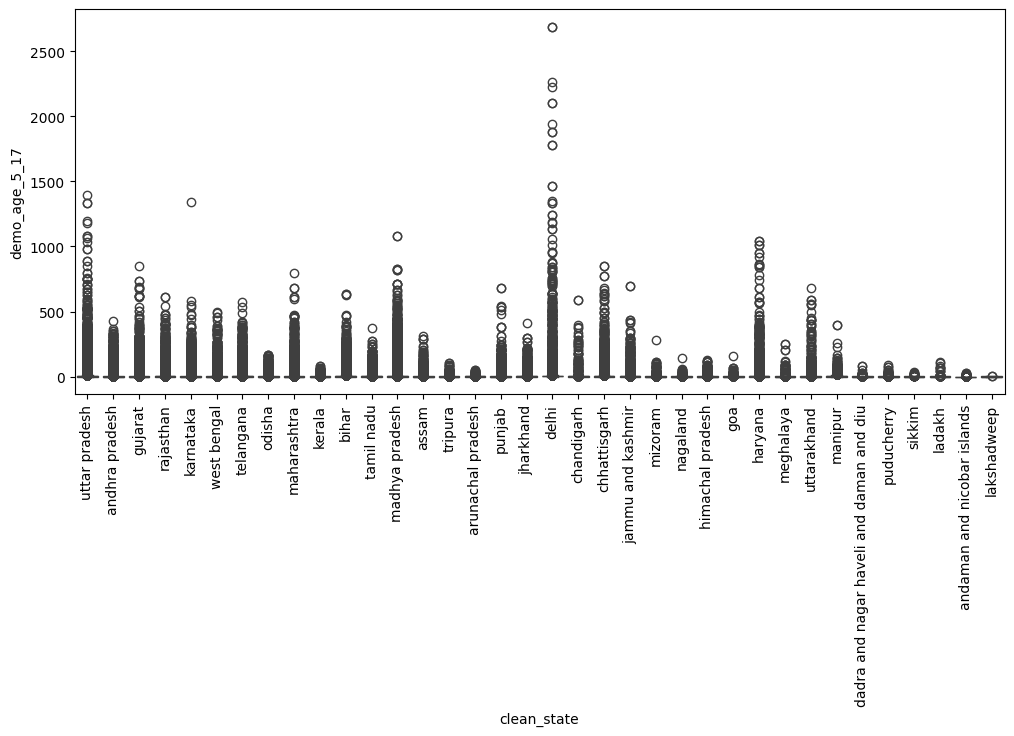

---------
Relation between clean_state and demo_age_17_


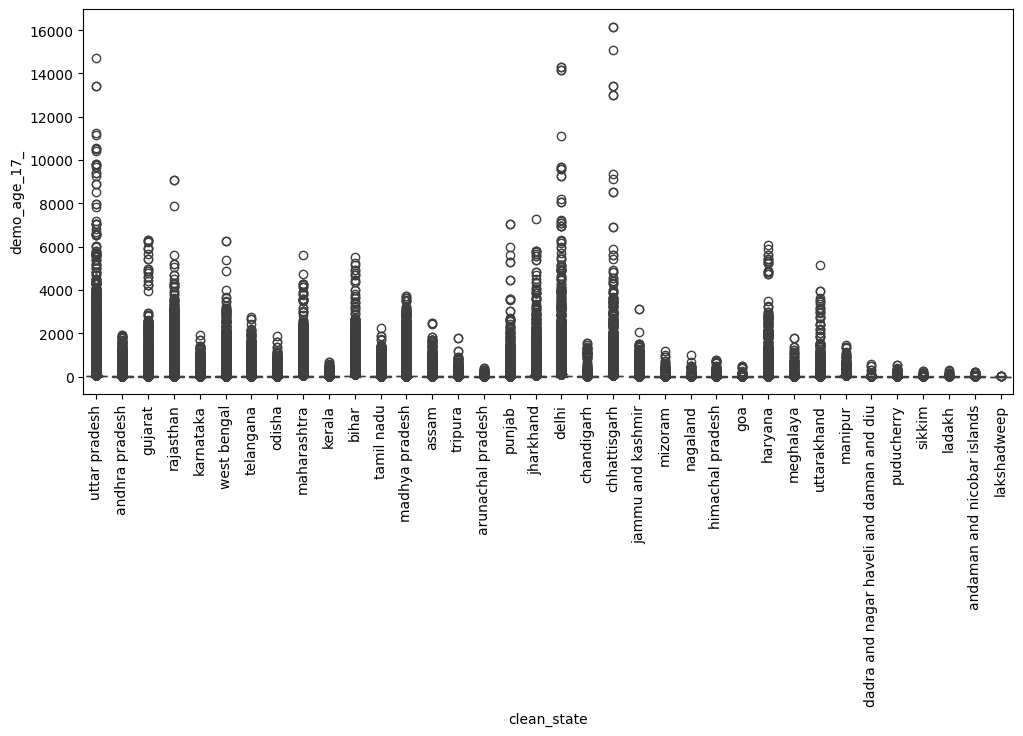

---------
Relation between district_clean and demo_age_5_17


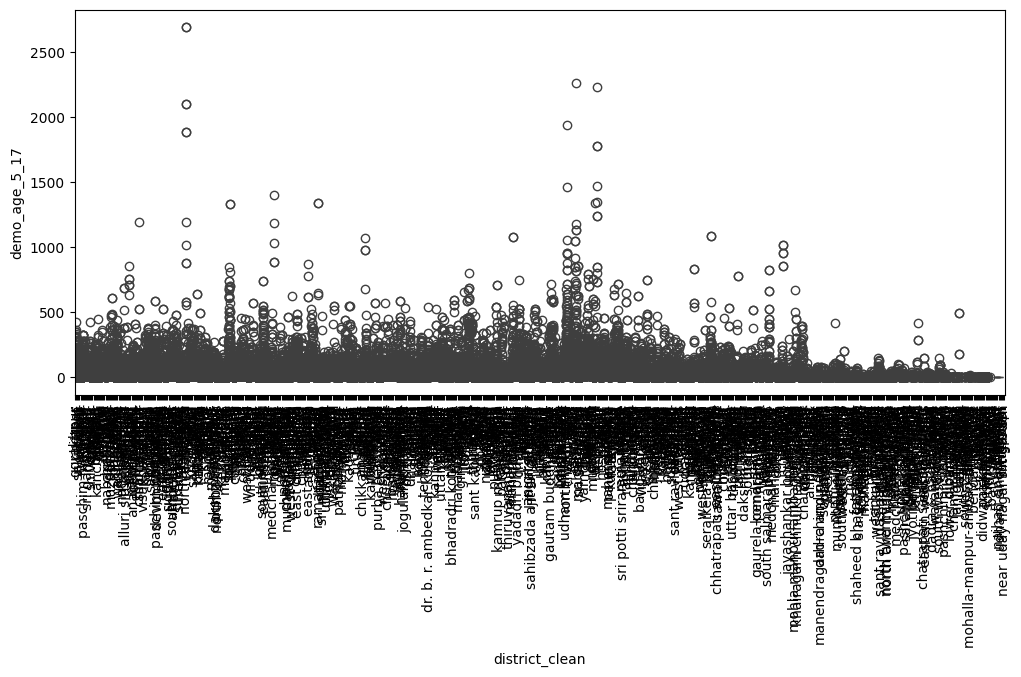

---------
Relation between district_clean and demo_age_17_


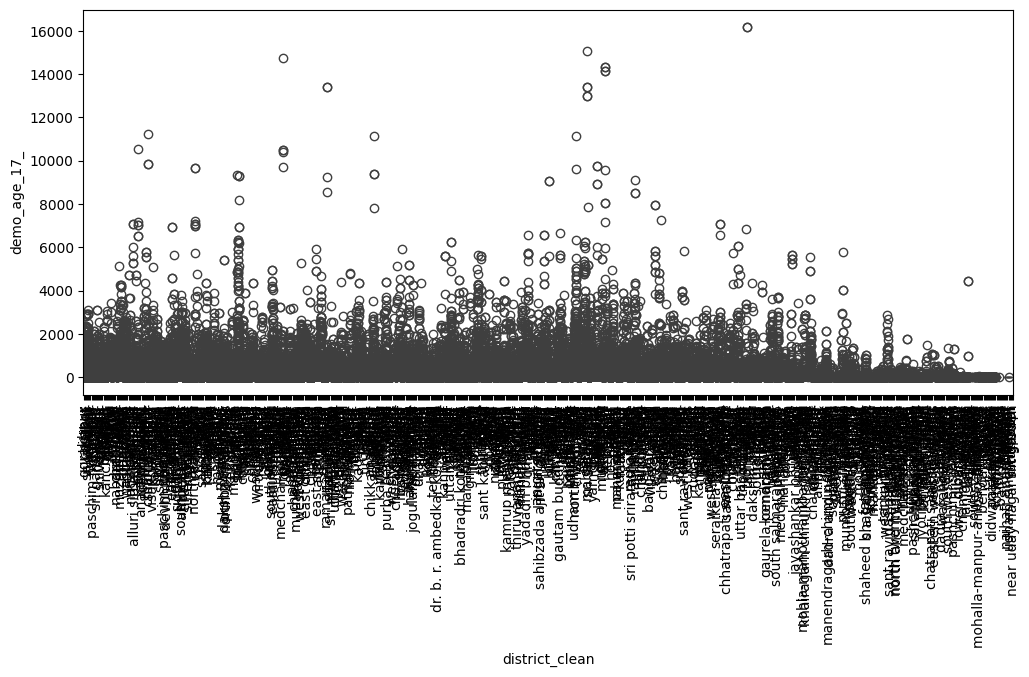

---------
Heatmap between clean_state and district_clean


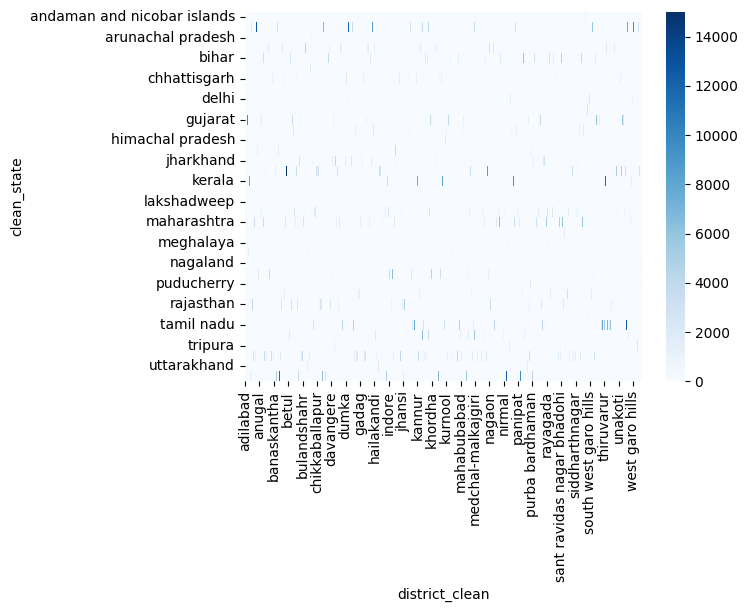

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
num_cols = ['demo_age_5_17', 'demo_age_17_']   # Use actual names!

for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        print(f"Relation between {num_cols[i]} and {num_cols[j]}")
        sns.scatterplot(data=df, x=num_cols[i], y=num_cols[j])
        plt.show()
        print("---------")


# 2. Categorical vs Numerical
cat_cols = ['clean_state', 'district_clean']

for cat in cat_cols:
    for num in num_cols:
        print(f"Relation between {cat} and {num}")
        plt.figure(figsize=(12,5))
        sns.boxplot(data=df, x=cat, y=num)
        plt.xticks(rotation=90)
        plt.show()
        print("---------")

# 3. Categorical vs Categorical
print("Heatmap between clean_state and district_clean")
crosstab = pd.crosstab(df['clean_state'], df['district_clean'])
sns.heatmap(crosstab, cmap='Blues')
plt.show()


## Multivarient

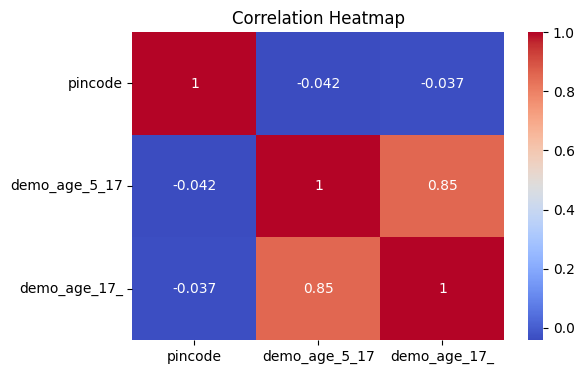

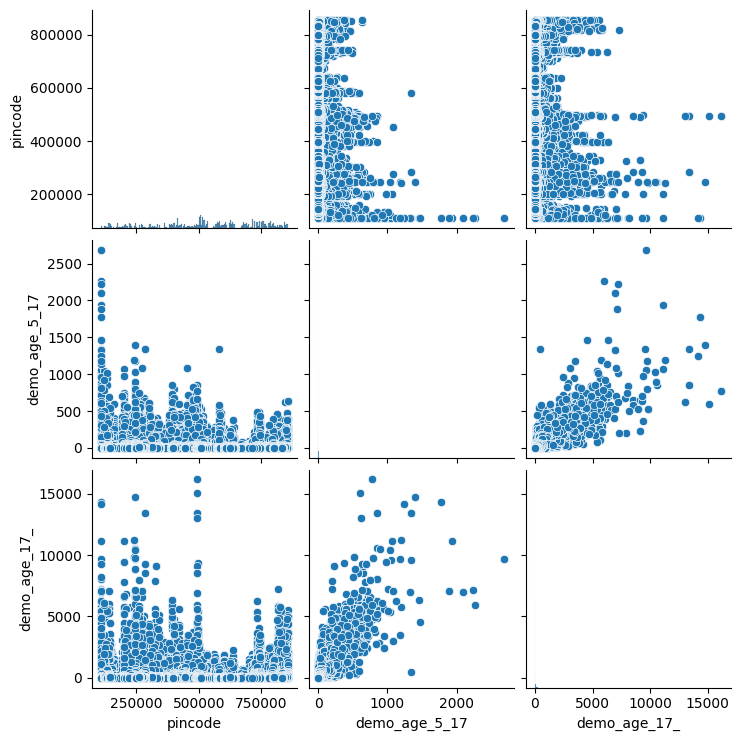

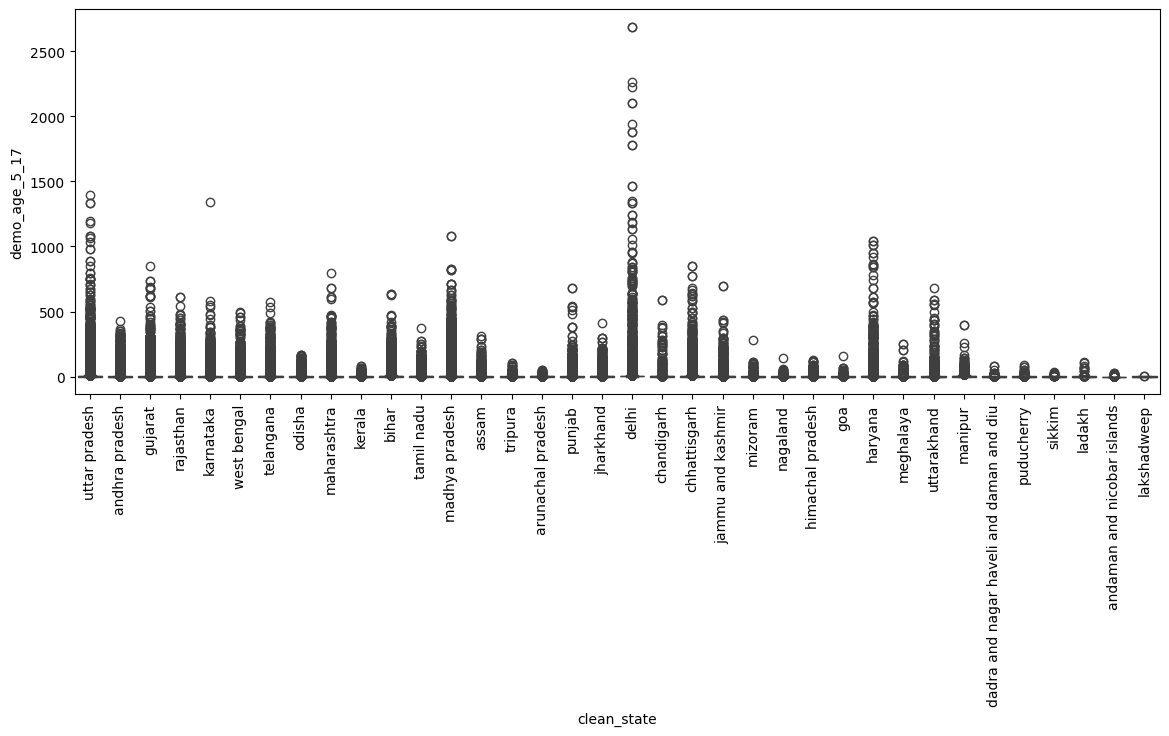

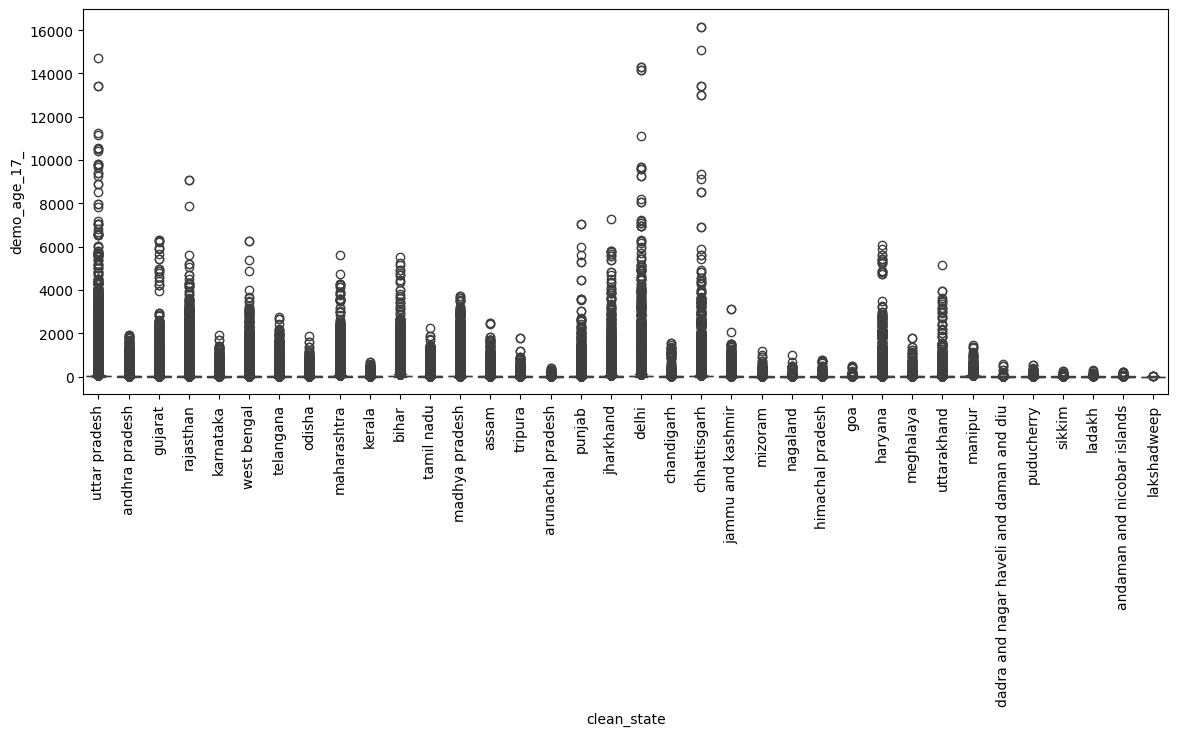

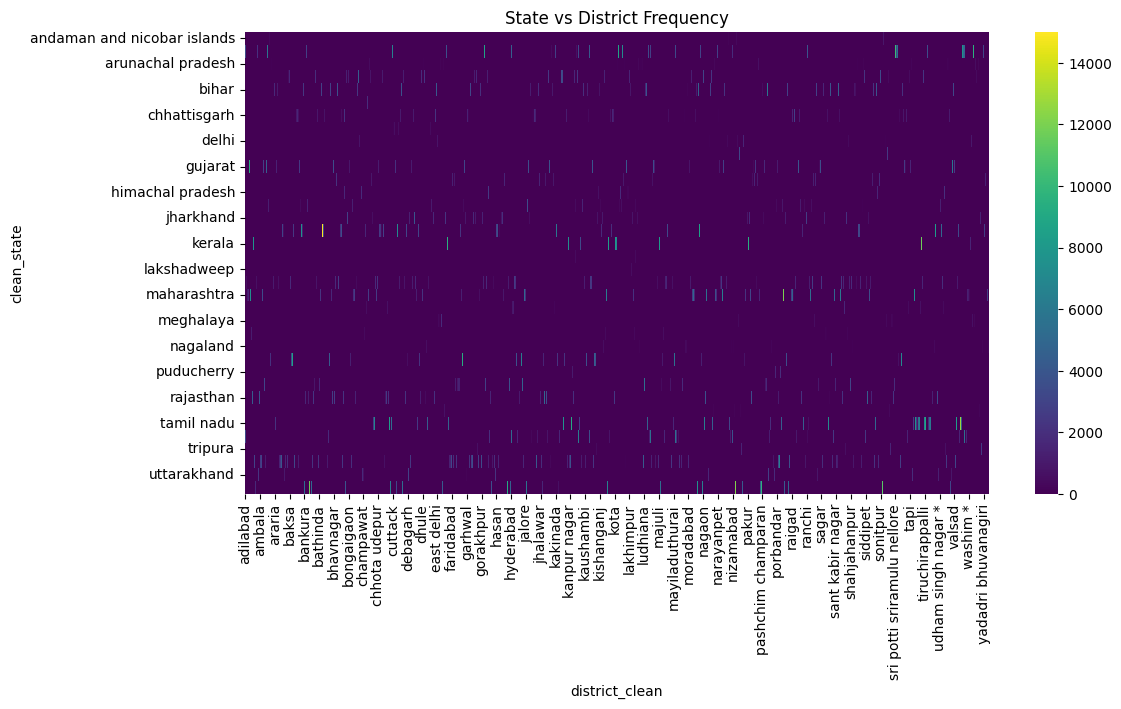

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Heatmap
num_cols = ['pincode', 'demo_age_5_17', 'demo_age_17_']
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Pairplot
sns.pairplot(df[num_cols])
plt.show()

# 3. Boxplot: State vs Ages
plt.figure(figsize=(14,5))
sns.boxplot(x='clean_state', y='demo_age_5_17', data=df)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(14,5))
sns.boxplot(x='clean_state', y='demo_age_17_', data=df)
plt.xticks(rotation=90)
plt.show()

# 4. Crosstab Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pd.crosstab(df['clean_state'], df['district_clean']),
            cmap='viridis')
plt.title("State vs District Frequency")
plt.show()


Enter State (e.g. Maharashtra):  Maharashtra
Enter District (e.g. Pune):  pune


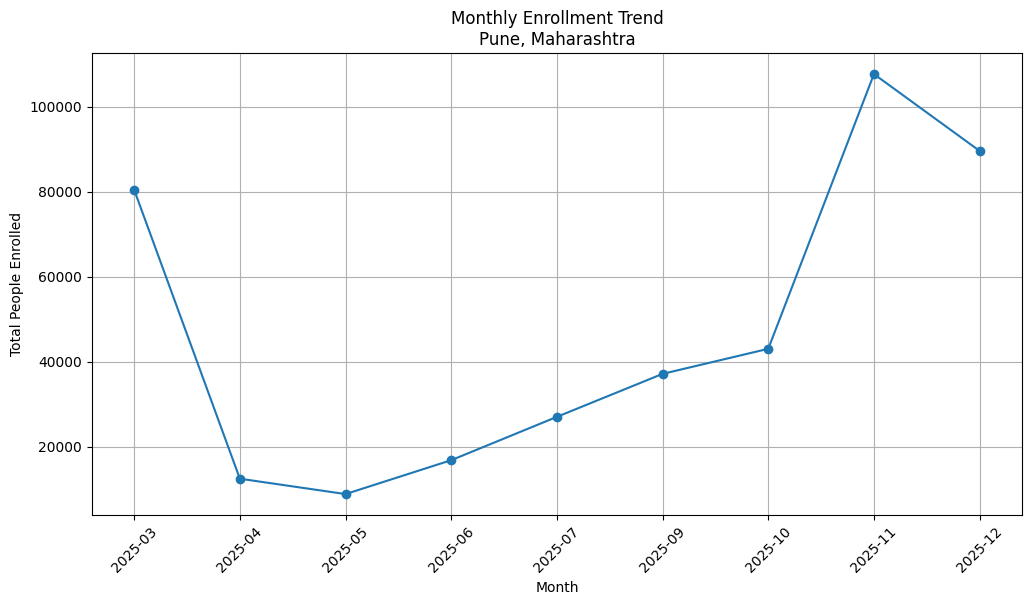

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

df['year_month'] = df['date'].dt.to_period('M')

df['total_people'] = df['demo_age_5_17'] + df['demo_age_17_']

selected_state = input("Enter State (e.g. Maharashtra): ").strip().lower()
selected_district = input("Enter District (e.g. Pune): ").strip().lower()

filtered_df = df[
    (df['clean_state'] == selected_state) &
    (df['district_clean'] == selected_district)
]

monthly_data = filtered_df.groupby('year_month')['total_people'].sum().reset_index()

monthly_data['year_month'] = monthly_data['year_month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_data['year_month'], monthly_data['total_people'], marker='o')


plt.title(f"Monthly Enrollment Trend\n{selected_district.title()}, {selected_state.title()}")
plt.xlabel("Month")
plt.ylabel("Total People Enrolled")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


In [79]:
df[df['clean_state'] == 'assam']

,date,state,district,pincode,demo_age_5_17,demo_age_17_,new_date,clean_state,district_clean,year_month,total_people
24,2025-03-01,assam,Tinsukia,786174,22,416,20250301,assam,tinsukia,2025-03,438
271,2025-03-01,assam,Charaideo,785693,16,190,20250301,assam,charaideo,2025-03,206
287,2025-03-01,assam,Udalguri,784114,42,343,20250301,assam,udalguri,2025-03,385
289,2025-03-01,assam,Nalbari,781371,10,143,20250301,assam,nalbari,2025-03,153
296,2025-03-01,assam,Karimganj,788726,11,160,20250301,assam,karimganj,2025-03,171
...,...,...,...,...,...,...,...,...,...,...,...
2066884,2025-12-29,assam,Udalguri,784513,0,1,20250915,assam,udalguri,2025-12,1
2066885,2025-12-29,assam,Udalguri,784522,2,17,20250915,assam,udalguri,2025-12,19
2066886,2025-12-29,assam,Udalguri,784525,0,14,20250915,assam,udalguri,2025-12,14
2066887,2025-12-29,assam,West Karbi Anglong,782435,0,2,20250915,assam,west karbi anglong,2025-12,2


Enter State (e.g. Maharashtra):  maharashtra
Enter District (e.g. Pune):  pune


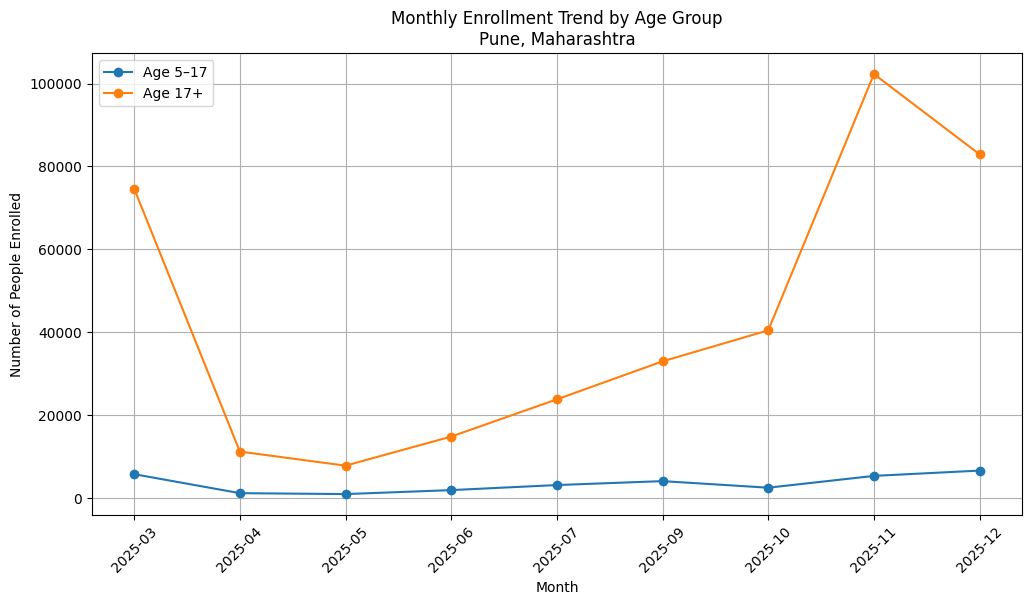

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# Create Year-Month column
df['year_month'] = df['date'].dt.to_period('M')

# ---------------- USER INPUT ----------------
selected_state = input("Enter State (e.g. Maharashtra): ").strip().lower()
selected_district = input("Enter District (e.g. Pune): ").strip().lower()

# ---------------- FILTER ----------------
filtered_df = df[
    (df['clean_state'] == selected_state) &
    (df['district_clean'] == selected_district)
]

# ---------------- GROUP BY MONTH ----------------
monthly_data = filtered_df.groupby('year_month').agg({
    'demo_age_5_17': 'sum',
    'demo_age_17_': 'sum'
}).reset_index()

# Convert Period to string for plotting
monthly_data['year_month'] = monthly_data['year_month'].astype(str)

# ---------------- PLOT ----------------
plt.figure(figsize=(12, 6))

plt.plot(monthly_data['year_month'], monthly_data['demo_age_5_17'],
         marker='o', label='Age 5–17')

plt.plot(monthly_data['year_month'], monthly_data['demo_age_17_'],
         marker='o', label='Age 17+')

plt.title(f"Monthly Enrollment Trend by Age Group\n{selected_district.title()}, {selected_state.title()}")
plt.xlabel("Month")
plt.ylabel("Number of People Enrolled")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

from rapidfuzz import process, fuzz



df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')
df['month'] = df['date'].dt.month

df['total_people'] = df['demo_age_5_17'] + df['demo_age_17_']

monthly_data = df.groupby(
    ['clean_state', 'district_clean', 'month']
)['total_people'].sum().reset_index()

state_encoder = LabelEncoder()
district_encoder = LabelEncoder()

monthly_data['state_enc'] = state_encoder.fit_transform(monthly_data['clean_state'])
monthly_data['district_enc'] = district_encoder.fit_transform(monthly_data['district_clean'])

X = monthly_data[['state_enc', 'district_enc', 'month']]
y = monthly_data['total_people']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📈 MODEL PERFORMANCE")
print("--------------------")
print("R² Score:", round(r2, 4))
print("RMSE:", round(rmse, 2))

def check_spelling(user_input, valid_list, threshold=80):
    match, score, _ = process.extractOne(
        user_input, valid_list, scorer=fuzz.ratio
    )

    if score < threshold:
        return None, f" Warning: Did you mean '{match}'?"
    else:
        return match, None

def predict_traffic(state, district, month):
    valid_states = monthly_data['clean_state'].unique().tolist()
    valid_districts = monthly_data['district_clean'].unique().tolist()

    state_fixed, state_warn = check_spelling(state.lower(), valid_states)
    district_fixed, district_warn = check_spelling(district.lower(), valid_districts)

    if state_fixed is None or district_fixed is None:
        return None, state_warn, district_warn

    state_enc = state_encoder.transform([state_fixed])[0]
    district_enc = district_encoder.transform([district_fixed])[0]

    prediction = model.predict([[state_enc, district_enc, month]])[0]

    return int(round(prediction)), state_warn, district_warn

while True:
    print("\n--- UIDAI Traffic Prediction System ---")

    user_state = input("Enter State (e.g. Maharashtra): ").strip().lower()
    user_district = input("Enter District (e.g. Pune): ").strip()

    try:
        user_month = int(input("Enter Month Number (1 = Jan, 12 = Dec): "))
        if user_month < 1 or user_month > 12:
            raise ValueError
    except ValueError:
        print("❌ Please enter a valid month number (1–12)")
        continue

    people, state_warn, district_warn = predict_traffic(
        user_state,
        user_district,
        user_month
    )

    print("\n📊 PREDICTION RESULT\n")
    

    if people is None:
        print("❌ Invalid state or district")
    else:
        print("Estimated People This Month:", people)

        if state_warn:
            print(state_warn)
        if district_warn:
            print(district_warn)


    cont = input("\nDo you want to make another prediction? (y/n): ").lower()
    if cont != 'y':
    
        print("👋 Exiting UIDAI Prediction System")
        break



📈 MODEL PERFORMANCE
--------------------
R² Score: 0.3688
RMSE: 9591.77

--- UIDAI Traffic Prediction System ---


Enter State (e.g. Maharashtra):  Maharashtra
Enter District (e.g. Pune):  raigarh
Enter Month Number (1 = Jan, 12 = Dec):  6



📊 PREDICTION RESULT

Estimated People This Month: 3493



Do you want to make another prediction? (y/n):  y



--- UIDAI Traffic Prediction System ---


Enter State (e.g. Maharashtra):  madhya pradesh
Enter District (e.g. Pune):  ujjain
Enter Month Number (1 = Jan, 12 = Dec):  11



📊 PREDICTION RESULT

Estimated People This Month: 7849



Do you want to make another prediction? (y/n):  y



--- UIDAI Traffic Prediction System ---


Enter State (e.g. Maharashtra):  maharashtra
Enter District (e.g. Pune):  nanded
Enter Month Number (1 = Jan, 12 = Dec):  4



📊 PREDICTION RESULT

Estimated People This Month: 4062



Do you want to make another prediction? (y/n):  y



--- UIDAI Traffic Prediction System ---


Enter State (e.g. Maharashtra):  bihar
Enter District (e.g. Pune):  parbhani
Enter Month Number (1 = Jan, 12 = Dec):  5



📊 PREDICTION RESULT

Estimated People This Month: 13552
